# Code to read file containing features related to mobile applications from csv file and estimate app ratings

In [1]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;

### 1. Load the data file using pandas. 

In [2]:
app_data=pd.read_csv('googleplaystore.csv')

### 2. Check for null values in the data. Get the number of null values for each column.

In [3]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Since there are total 10841 entries and "Rating", "Type", "Content Rating" , "Current Ver" and "Android Ver" columns have less than 10841 non-null values, it implies that these columns have null values. Other columns do not have null values

In [4]:
for i in app_data.columns:
    print("Number of null values in the column '"+i+"' are :\t"+str(len(app_data[app_data[i].isna()])))

Number of null values in the column 'App' are :	0
Number of null values in the column 'Category' are :	0
Number of null values in the column 'Rating' are :	1474
Number of null values in the column 'Reviews' are :	0
Number of null values in the column 'Size' are :	0
Number of null values in the column 'Installs' are :	0
Number of null values in the column 'Type' are :	1
Number of null values in the column 'Price' are :	0
Number of null values in the column 'Content Rating' are :	1
Number of null values in the column 'Genres' are :	0
Number of null values in the column 'Last Updated' are :	0
Number of null values in the column 'Current Ver' are :	8
Number of null values in the column 'Android Ver' are :	3


### 3. Drop records with nulls in any of the columns. 

In [5]:
app_data.dropna(inplace=True)
app_data.reset_index(inplace=True,drop=True)

In [6]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 950.8+ KB


### 4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

* Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.

1. Extract the numeric value from the column
2. Multiply the value by 1,000, if size is mentioned in Mb

In [7]:
app_data['Size'].value_counts()

Varies with device    1637
14M                    165
12M                    161
15M                    159
11M                    159
                      ... 
383k                     1
454k                     1
812k                     1
442k                     1
619k                     1
Name: Size, Length: 413, dtype: int64

#### Consider Size = 'varies with device' as unknown and drop the rows

In [8]:
app_data['Size']=app_data['Size'].apply(lambda val: val[:-1] if val[-1]=='k' else val[:-1]+'000' if val[-1]=='M' else '0').astype('float')

In [9]:
app_data.drop(index=app_data[app_data['Size']==0].index,inplace=True);
app_data.reset_index(inplace=True,drop=True)

In [10]:
app_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7718,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.0,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
7719,FR Calculator,FAMILY,4.0,7,2.6,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
7720,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
7721,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


- Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [11]:
app_data['Reviews']=app_data['Reviews'].astype('int')

- Installs field is currently stored as string and has values like 1,000,000+. 

1. Treat 1,000,000+ as 1,000,000

2. remove ‘+’, ‘,’ from the field, convert it to integer

In [12]:
def convert_to_int(value):
    new_value='';
    for i in value:
        if(i!='+' and i!=','):
            new_value+=i;
    return(int(new_value));


app_data['Installs']=app_data['Installs'].apply(lambda val: convert_to_int(val) )

- Price field is a string and has dollar symbol. Remove dollar sign, and convert it to numeric.

In [13]:
app_data['Price']=app_data['Price'].apply(lambda val: val[1:] if val.startswith('$') else val).astype('float');

In [14]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7723 entries, 0 to 7722
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7723 non-null   object 
 1   Category        7723 non-null   object 
 2   Rating          7723 non-null   float64
 3   Reviews         7723 non-null   int32  
 4   Size            7723 non-null   float64
 5   Installs        7723 non-null   int64  
 6   Type            7723 non-null   object 
 7   Price           7723 non-null   float64
 8   Content Rating  7723 non-null   object 
 9   Genres          7723 non-null   object 
 10  Last Updated    7723 non-null   object 
 11  Current Ver     7723 non-null   object 
 12  Android Ver     7723 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 754.3+ KB


### Sanity checks

- Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [15]:
app_data=app_data[(app_data['Rating']<=5) & (app_data['Rating']>=1)]

- Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [16]:
app_data=app_data[app_data['Reviews']<=app_data['Installs']]

- For free apps (type = “Free”), the price should not be >0. Drop any such rows

In [17]:
app_data=app_data[(app_data['Type']!='Free') | (app_data['Price']==0)]

### 5.  Performing univariate analysis: 

#### Boxplot for Price

Are there any outliers? Think about the price of usual apps on Play Store.

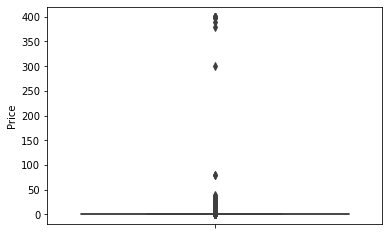

In [18]:
sns.boxplot(y='Price',data=app_data);

Most of the apps are free of charge. However, very few apps are paid.

#### Boxplot for Reviews

Are there any apps with very high number of reviews? Do the values seem right?

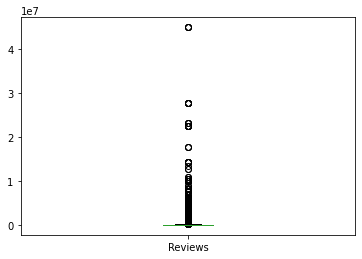

In [19]:
fig2,ax2=plt.subplots(1,1)
app_data.boxplot(column='Reviews', grid=False,ax=ax2);

- The values seem right because the outliers have reviews in the order of 1e7 (i.e. 10000000)
- If we reduce the limit in y-axis we get a better idea about the boxplot 

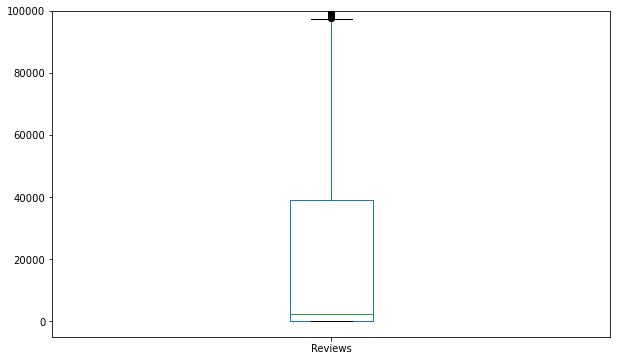

In [20]:
fig3,ax3=plt.subplots(1,1, figsize=(10,6))
app_data.boxplot(column='Reviews', grid=False,ax=ax3);
ax3.set_ylim([-5000,100000]);

In [21]:
app_data['Reviews'].describe()

count    7.717000e+03
mean     2.951275e+05
std      1.864640e+06
min      1.000000e+00
25%      1.090000e+02
50%      2.351000e+03
75%      3.910900e+04
max      4.489389e+07
Name: Reviews, dtype: float64

- If we reduce the y-limit of the boxplot to 100000, we get a better understanding of the plot.
- Most applications are not very popular and have very less number of reviews due to very low median
- Even Q3 (75 percentile value) is close to 40000. (39109 based on describe function)
- Only few outliers have Reviews >100000. Marginally small number of applications are extremely popular and have more than a million views.
- Infact, the application with maximum views is an extreme outlier with 44.89 million views.

#### Histogram for Rating

How are the ratings distributed? Is it more toward higher ratings?

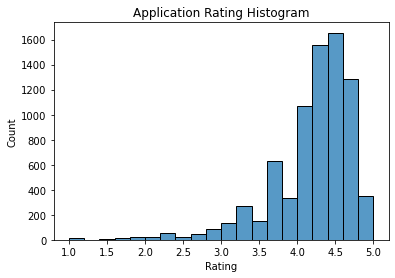

In [22]:
fig4,ax4=plt.subplots(1,1);
sns.histplot(data=app_data,x='Rating', bins=20);
ax4.set_title('Application Rating Histogram', fontsize=12);

- The histogram distribution of Ratings is more towards the higher end
- A large number of applications have ratings between 4 and 4.8 (out of 5)

#### Histogram for Size

Note down your observations for the plots made above. Which of these seem to have outliers?

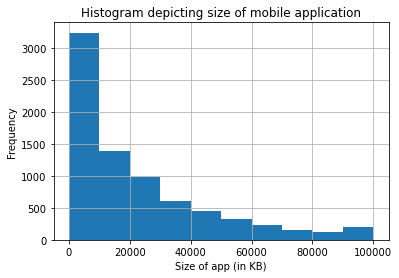

In [23]:
fig5,ax5=plt.subplots(1,1)
app_data['Size'].hist(ax=ax5);
ax5.set_xlabel('Size of app (in KB)',fontsize=10);
ax5.set_ylabel('Frequency',fontsize=10);
ax5.set_title('Histogram depicting size of mobile application',fontsize=12);

- Most of the applications seem to have size < 40000 KB (40 MB)
- Very few outliers have size >80000 KB (80 MB) 

### 6. Outlier treatment: 

**Price:** From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!

Check out the records with very high price

Is 200 indeed a high price?

Drop these as most seem to be junk apps

In [24]:
app_data[app_data['Price']>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2911,most expensive app (H),FAMILY,4.3,6,1.5,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
3041,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
3045,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
3792,I am rich,LIFESTYLE,3.8,3547,1.8,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
3795,I am Rich Plus,FAMILY,4.0,856,8.7,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
3796,I am rich VIP,LIFESTYLE,3.8,411,2.6,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
3797,I Am Rich Premium,FINANCE,4.1,1867,4.7,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
3798,I am extremely Rich,LIFESTYLE,2.9,41,2.9,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
3799,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
3800,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [25]:
app_data.drop(index=app_data[app_data['Price']>200].index, inplace=True);
app_data.reset_index(inplace=True, drop=True);

**Reviews:** Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [26]:
app_data[app_data['Reviews']>100000]['Rating'].value_counts()

4.5    256
4.4    234
4.3    206
4.6    166
4.2    148
4.1     79
4.7     79
4.0     50
4.8     30
3.9     23
3.8     10
3.7      9
4.9      5
3.6      4
3.5      4
3.4      3
3.3      3
2.8      1
Name: Rating, dtype: int64

In [27]:
app_data.drop(index=app_data[app_data['Reviews']>100000].index, inplace=True);
app_data.reset_index(inplace=True, drop=True);

**Installs:**  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

Decide a threshold as cutoff for outlier and drop records having values more than that

In [28]:
app_data['Installs'].describe()

count    6.392000e+03
mean     8.201466e+05
std      2.616232e+06
min      5.000000e+00
25%      5.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+08
Name: Installs, dtype: float64

In [29]:
np.percentile(app_data['Installs'],q=[10,25,50,70,75,90,95,99])

array([1.e+03, 5.e+03, 1.e+05, 5.e+05, 1.e+06, 1.e+06, 5.e+06, 1.e+07])

<AxesSubplot:>

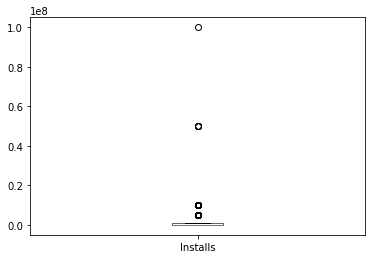

In [30]:
app_data.boxplot(column='Installs', grid=False)

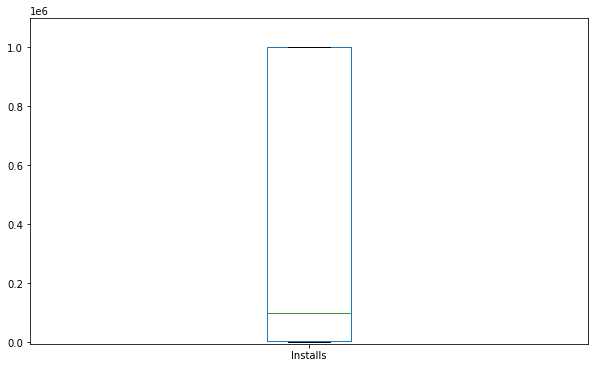

In [31]:
fig6,ax6=plt.subplots(1,1, figsize=(10,6))
app_data.boxplot(column='Installs', grid=False,ax=ax6);
ax6.set_ylim([-5000,1100000]);

In [32]:
app_data.drop(index=app_data[app_data['Installs']>1100000].index, inplace=True);
app_data.reset_index(inplace=True, drop=True);

In [33]:
app_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
3,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5882,FR Tides,WEATHER,3.8,1195,582.0,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
5883,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.0,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
5884,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
5885,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


### 7. Bivariate analysis: 

#### Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

**Rating vs Price**
- Make scatter plot/joinplot for Rating vs. Price
- What pattern do you observe? Does rating increase with price?

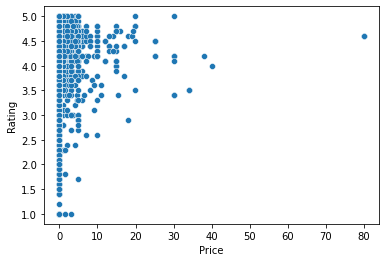

In [34]:
sns.scatterplot(x='Price',y='Rating',data=app_data);

In [35]:
app_data[['Rating','Price']].corr()

,Rating,Price
Rating,1.000000,0.034746
Price,0.034746,1.000000


- Price vs Rating scatterplot suggests that highly priced applications do not tend to have low rating.
- However, scatterplot does NOT indicate increase in rating with price. There are many free apps which have high rating.

**Rating vs Size**
- Make scatter plot/joinplot for Rating vs. Size

- Are heavier apps rated better?

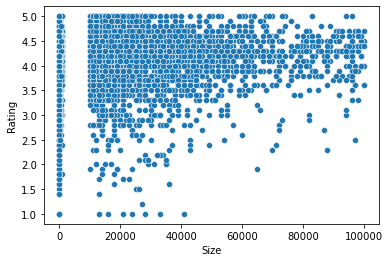

In [36]:
sns.scatterplot(x='Size',y='Rating',data=app_data);

- Rating vs Size scatterplot suggests that heavy applications do not tend to have low rating.
- However, scatterplot does NOT indicate increase in rating with application size. 
- There are many light applications which have high rating.

In [37]:
app_data[['Rating','Size']].corr()

,Rating,Size
Rating,1.000000,0.023833
Size,0.023833,1.000000


**Rating vs Reviews**
- Make scatter plot/joinplot for Rating vs. Reviews

- Does more review mean a better rating always?

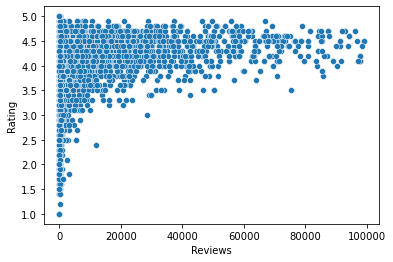

In [38]:
sns.scatterplot(x='Reviews',y='Rating',data=app_data);

In [39]:
app_data[['Rating','Reviews']].corr()

,Rating,Reviews
Rating,1.000000,0.137574
Reviews,0.137574,1.000000


- Rating vs review scatterplot suggests that applications with more reviews tend to have reasonably high average rating.
- However, scatterplot does NOT indicate this in all cases 
- There are many high rated applications with less number of reviews. 

**Rating vs Content Rating**
- Make boxplot for Rating vs. Content Rating

- Is there any difference in the ratings? Are some types liked better?

In [40]:
app_data['Content Rating'].value_counts()

Everyone           4866
Teen                546
Mature 17+          285
Everyone 10+        187
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

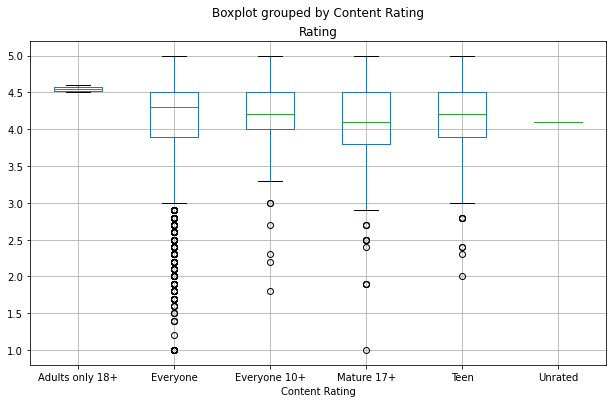

In [41]:
app_data.boxplot(column='Rating',by='Content Rating', figsize=(10,6));

- It is difficult to estimate the Rating of the application based on content rating

**Ratings vs. Category**
- Make boxplot for Ratings vs. Category
- Which genre has the best ratings?



In [42]:
app_data['Category'].value_counts()

FAMILY                 1289
TOOLS                   518
GAME                    480
MEDICAL                 318
LIFESTYLE               241
FINANCE                 232
PERSONALIZATION         227
BUSINESS                222
PRODUCTIVITY            183
HEALTH_AND_FITNESS      180
SPORTS                  175
DATING                  158
COMMUNICATION           140
NEWS_AND_MAGAZINES      140
PHOTOGRAPHY             133
BOOKS_AND_REFERENCE     129
SOCIAL                  123
TRAVEL_AND_LOCAL        118
SHOPPING                107
VIDEO_PLAYERS            82
MAPS_AND_NAVIGATION      81
EDUCATION                77
FOOD_AND_DRINK           65
AUTO_AND_VEHICLES        58
LIBRARIES_AND_DEMO       55
ART_AND_DESIGN           52
ENTERTAINMENT            51
HOUSE_AND_HOME           50
COMICS                   47
PARENTING                43
WEATHER                  40
EVENTS                   37
BEAUTY                   36
Name: Category, dtype: int64

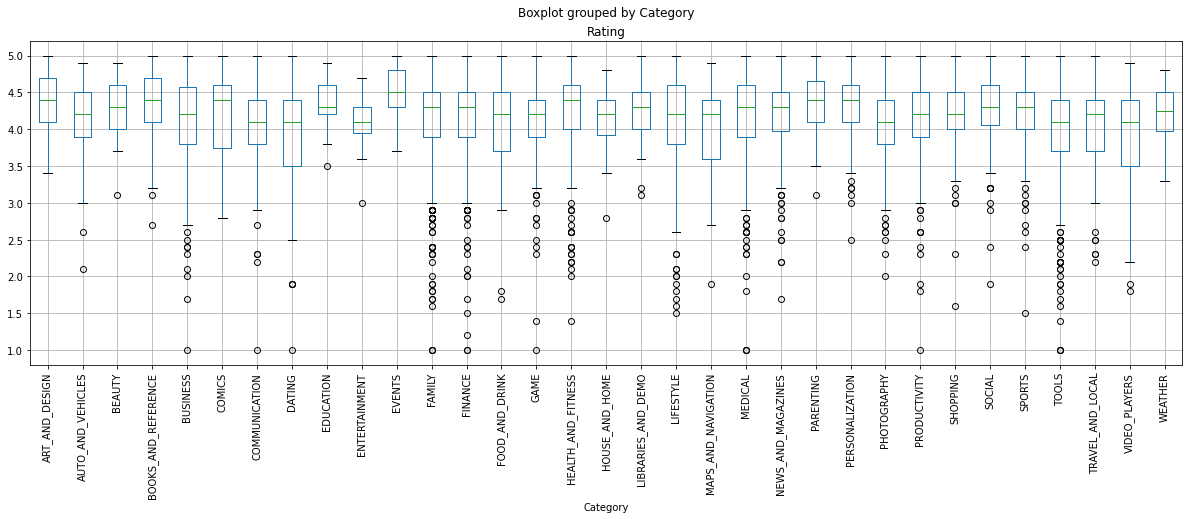

In [43]:
fig7,ax7=plt.subplots(1,1, figsize=(20,6))
app_data.boxplot(column='Rating',by='Category', ax=ax7);
plt.xticks(rotation=90);

- Some categories like events, parenting, personalization, beauty, books and references etc. seem to portray relatively high rating.
- Some other categories like business, dating, tools, video players, photography, commonication etc. seem to have comparatively lower rating.
- However, it is very difficult to determine/deduce the rating based on category alone

For each of the plots above, note down your observation.

In [44]:
app_data['Genres'].value_counts()

Tools                                518
Education                            385
Entertainment                        376
Medical                              318
Lifestyle                            241
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Music & Audio;Music & Video            1
Health & Fitness;Education             1
Entertainment;Pretend Play             1
Name: Genres, Length: 104, dtype: int64

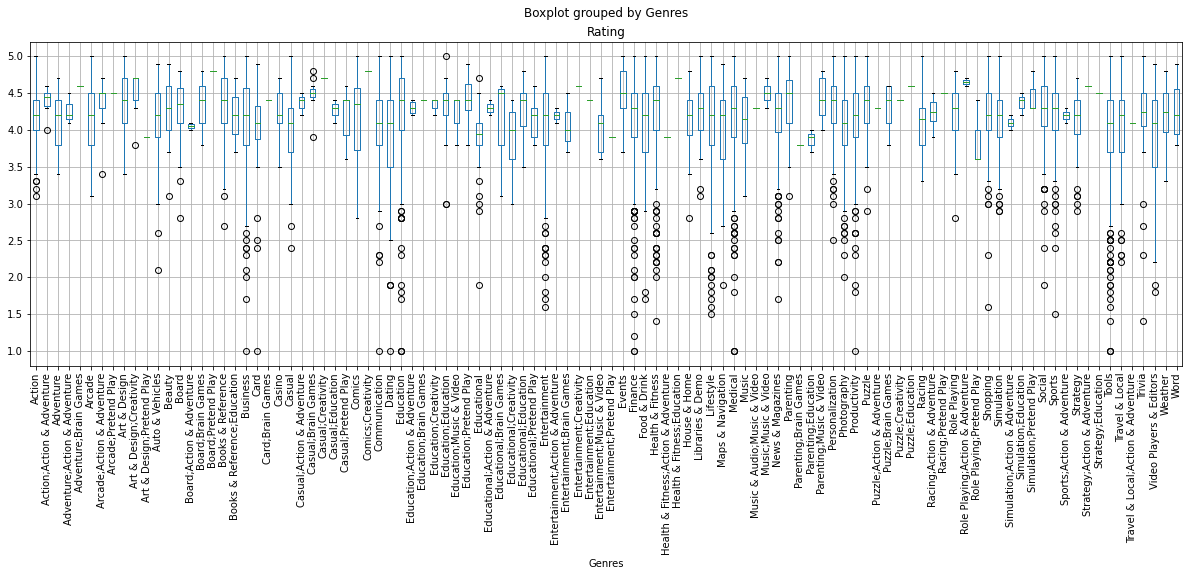

In [45]:
fig8,ax8=plt.subplots(1,1, figsize=(20,6))
app_data.boxplot(column='Rating',by='Genres', ax=ax8);
plt.xticks(rotation=90);

- Though Genre data is insufficient to estimate the rating, some highly rated genres include casual brain games, casual crativity, arcade pretend play, adventure/brain games, entertainment creativity, house and home, role playing action and adventure, Strategy education, stategy action and adventure etc.

### 8. Data preprocessing

- For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.

In [46]:
inp1=app_data.copy()

In [47]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
3,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
4,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5882,FR Tides,WEATHER,3.8,1195,582.0,100000,Free,0.0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
5883,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619.0,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
5884,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
5885,Sya9a Maroc - FR,FAMILY,4.5,38,53000.0,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up


- Reviews and Install have some values that are still relatively very high. 
- Before building a linear regression model, you need to reduce the skew. 
- Apply log transformation (np.log1p) to Reviews and Installs.


In [48]:
inp1.Reviews=np.log1p(inp1.Reviews);

In [49]:
inp1.Installs=np.log1p(inp1.Installs);

In [50]:
inp1.Installs

0        9.210440
1       13.122365
2       11.512935
3       10.819798
4       10.819798
          ...    
5882    11.512935
5883     6.908755
5884     6.216606
5885     8.517393
5886     4.615121
Name: Installs, Length: 5887, dtype: float64

- Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [51]:
inp1.drop(axis=1,columns=['App','Last Updated','Current Ver','Android Ver'], inplace=True)

In [52]:
inp1

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,ART_AND_DESIGN,4.1,5.075174,19000.0,9.210440,Free,0.0,Everyone,Art & Design
1,ART_AND_DESIGN,3.9,6.875232,14000.0,13.122365,Free,0.0,Everyone,Art & Design;Pretend Play
2,ART_AND_DESIGN,4.3,6.875232,2.8,11.512935,Free,0.0,Everyone,Art & Design;Creativity
3,ART_AND_DESIGN,4.4,5.123964,5.6,10.819798,Free,0.0,Everyone,Art & Design
4,ART_AND_DESIGN,3.8,5.187386,19000.0,10.819798,Free,0.0,Everyone,Art & Design
...,...,...,...,...,...,...,...,...,...
5882,WEATHER,3.8,7.086738,582.0,11.512935,Free,0.0,Everyone,Weather
5883,BOOKS_AND_REFERENCE,4.8,3.806662,619.0,6.908755,Free,0.0,Everyone,Books & Reference
5884,FAMILY,4.0,2.079442,2.6,6.216606,Free,0.0,Everyone,Education
5885,FAMILY,4.5,3.663562,53000.0,8.517393,Free,0.0,Everyone,Education


- Get dummy columns for Category, Genres, and Content Rating. 
- This needs to be done as the models do not understand categorical data, and all data should be numeric. 
- Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [53]:
temp1=pd.get_dummies(inp1[['Category','Genres','Content Rating','Type']],drop_first=True);
temp2=inp1[['Reviews','Size','Installs', 'Price','Rating']]

In [54]:
inp2=pd.concat([temp1,temp2],axis=1,join='inner')

In [55]:
print(temp1.shape)
print(temp2.shape)
print(inp2.shape)

(5887, 141)
(5887, 5)
(5887, 146)


###  9. Apply 70-30 split. (70% training data , 30% test data) Name the new dataframes df_train and df_test.

In [56]:
from sklearn.model_selection import train_test_split;

In [57]:
df_train,df_test=train_test_split(inp2,test_size=0.3, random_state=0);

In [58]:
print(df_train.shape)
print(df_test.shape)

(4120, 146)
(1767, 146)


### 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [59]:
X_train=df_train.drop(axis=1,columns=['Rating']);
y_train=df_train['Rating'];
X_test=df_test.drop(axis=1,columns=['Rating']);
y_test=df_test['Rating'];

In [60]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4120, 145)
(4120,)
(1767, 145)
(1767,)


### 11 . Model building

Use linear regression as the technique

Report the R2 on the train set

In [61]:
from sklearn.linear_model import LinearRegression, Ridge;
from sklearn.model_selection import cross_val_score,cross_val_predict, GridSearchCV

lr_model=LinearRegression();
lr_model.fit(X_train,y_train);
print("R2 value on training set",lr_model.score(X_train,y_train))
#ridge_model=Ridge(a)
print(cross_val_score(lr_model,X_train,y_train, cv=10))
print("Mean cross validation score is using Simple Linear Regression",np.mean(cross_val_score(lr_model,X_train,y_train, cv=10)))
#print(cross_val_score(ridge_model,X_train,y_train, cv=10))

R2 value on training set 0.14106110072732736
[0.09702076 0.10559632 0.07585351 0.14849347 0.15121734 0.13028916
 0.11265585 0.09170009 0.10023653 0.04723537]
Mean cross validation score is using Simple Linear Regression 0.10602983827715451


### Let us try to improve R2 score using Ridge Regression with GridSearchCV on training data

In [62]:
ridge_model=Ridge()
grid_learn1= GridSearchCV(ridge_model,param_grid=[{'alpha':[0,0.1,1,10,100],'normalize':[True,False],'solver':['auto','svd']}],n_jobs=-1,cv=10);
grid_learn1.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [0, 0.1, 1, 10, 100],
                          'normalize': [True, False],
                          'solver': ['auto', 'svd']}])

In [63]:
grid_learn1.best_estimator_

Ridge(alpha=10)

In [64]:
grid_learn1.best_score_

0.11361217008677302

In [65]:
grid_learn1.cv_results_['mean_test_score']

array([-4.52311422e+25, -4.52311422e+25, -1.86921955e+19, -1.86921955e+19,
        7.59891679e-02,  7.59891679e-02,  1.08314036e-01,  1.08314036e-01,
        3.35015360e-02,  3.35015360e-02,  1.10935138e-01,  1.10935138e-01,
        8.15617193e-03,  8.15617193e-03,  1.13612170e-01,  1.13612170e-01,
       -1.88030788e-03, -1.88030788e-03,  1.10488995e-01,  1.10488995e-01])

In [66]:
grid_learn1.cv_results_['params']

[{'alpha': 0, 'normalize': True, 'solver': 'auto'},
 {'alpha': 0, 'normalize': True, 'solver': 'svd'},
 {'alpha': 0, 'normalize': False, 'solver': 'auto'},
 {'alpha': 0, 'normalize': False, 'solver': 'svd'},
 {'alpha': 0.1, 'normalize': True, 'solver': 'auto'},
 {'alpha': 0.1, 'normalize': True, 'solver': 'svd'},
 {'alpha': 0.1, 'normalize': False, 'solver': 'auto'},
 {'alpha': 0.1, 'normalize': False, 'solver': 'svd'},
 {'alpha': 1, 'normalize': True, 'solver': 'auto'},
 {'alpha': 1, 'normalize': True, 'solver': 'svd'},
 {'alpha': 1, 'normalize': False, 'solver': 'auto'},
 {'alpha': 1, 'normalize': False, 'solver': 'svd'},
 {'alpha': 10, 'normalize': True, 'solver': 'auto'},
 {'alpha': 10, 'normalize': True, 'solver': 'svd'},
 {'alpha': 10, 'normalize': False, 'solver': 'auto'},
 {'alpha': 10, 'normalize': False, 'solver': 'svd'},
 {'alpha': 100, 'normalize': True, 'solver': 'auto'},
 {'alpha': 100, 'normalize': True, 'solver': 'svd'},
 {'alpha': 100, 'normalize': False, 'solver': 'au

#### In this case mean cross validation score for Ridge regression with alpha=10 is better than LinearRegression

In [67]:
model_selected= Ridge(alpha=10);
model_selected.fit(X_train,y_train);

### 12. Make predictions on test set and report R2.

In [68]:
print('R2 score for test set is' , model_selected.score(X_test,y_test))

R2 score for test set is 0.12267106985874443


### R2 score during testing is even better than validation R2 score

In [69]:
print("Predicted ratings for test data=\n")
print(pd.Series(model_selected.predict(X_test),name='predictions'))

Predicted ratings for test data=

0       3.998050
1       3.922237
2       4.187497
3       3.974717
4       4.121654
          ...   
1762    3.913958
1763    4.648926
1764    3.880192
1765    4.479485
1766    3.896281
Name: predictions, Length: 1767, dtype: float64


In [70]:
y_test

4886    3.3
304     4.4
4991    5.0
3985    4.0
1859    4.5
       ... 
5609    3.8
2134    4.7
4553    4.6
5248    5.0
325     3.9
Name: Rating, Length: 1767, dtype: float64

In [71]:
y_hat=pd.Series(model_selected.predict(X_test),name='predictions')

In [72]:
y_test.reset_index(inplace=True,drop=True)

In [73]:
estimation_info=pd.concat([y_hat,y_test],axis=1,join='inner')

In [77]:
estimation_info

,predictions,Rating
0,3.998050,3.3
1,3.922237,4.4
2,4.187497,5.0
3,3.974717,4.0
4,4.121654,4.5
...,...,...
1762,3.913958,3.8
1763,4.648926,4.7
1764,3.880192,4.6
1765,4.479485,5.0
